<a href="https://colab.research.google.com/github/Felix-yaw/FELIX-PROJECTS/blob/main/Classification%20using%20support%20vector%20Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
 #Loading the data
 df = pd.read_csv('cell_samples.csv')
 df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
#Data overview and preprocessing
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


<Axes: xlabel='Clump', ylabel='UnifSize'>

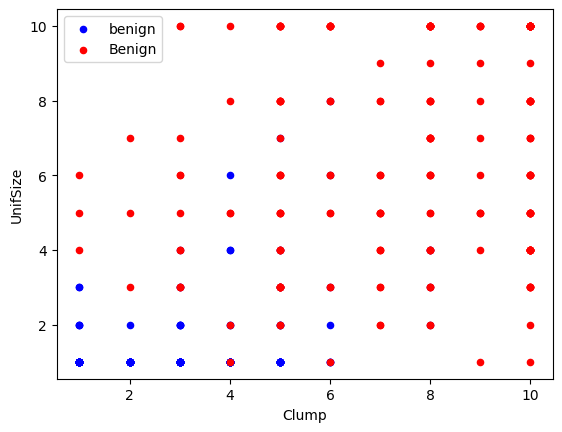

In [15]:
#data visualization to view data distributions
mdf= df[df['Class']==4][0:200]
bdf = df[df['Class']==2][0:200]

axes = bdf.plot(kind = 'scatter', x='Clump', y= 'UnifSize', color = 'blue', label = 'benign')
mdf.plot(kind = 'scatter', x= 'Clump', y= 'UnifSize', color = 'red', label = 'Benign', ax = axes)

In [18]:

#Data preprocessing techniques
df = df[pd.to_numeric(df['BareNuc'], errors = 'coerce').notnull()]
df['BareNuc']=df['BareNuc'].astype('int')
df.dtypes

,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,int64
BlandChrom,int64
NormNucl,int64
Mit,int64


In [23]:
#Setting features and target variable
ft = df.drop(columns =['Class', 'ID'])
x = np.asarray(ft)
y = np.asarray(df['Class'])
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [25]:
#Doing a split for training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [31]:
#Training and Testing the model
from sklearn import svm
classifier = svm.SVC(kernel = 'linear', gamma= 'auto', C=2)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

In [34]:
#Evaluating the results of the classifier
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97        79
           4       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

